In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [2]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (60000,))

In [3]:
#Normalize the dataset to 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
#Add the grey scale channel (called channel 1) to the existing rows and columns.
X_train = X_train[..., None]
X_test = X_test[..., None]

In [5]:
val_size = 6000
X_val = X_train[:val_size]
y_val = y_train[:val_size]

X_tr = X_train[val_size:]
y_tr = y_train[val_size:]

In [6]:
X_val.shape, y_val.shape, X_tr.shape, y_tr.shape

((6000, 28, 28, 1), (6000,), (54000, 28, 28, 1), (54000,))

In [7]:
# RandomTranslation(height_factor=0.08, width_factor=0.08) moves (shifts) the whole image up/down and left/right by a random amount.
# height_factor=0.08 → shift up/down by up to 0.08 × 28 = 2.24 pixels
# width_factor=0.08 → shift left/right by up to 0.08 × 28 = 2.24 pixels
# So the digit might move about ±2 pixels vertically and ±2 pixels horizontally (roughly).
# When you shift an image, part of it moves out of frame and new blank area appears on the opposite side. Keras fills that new area (typically with 0 / black).

use_argmentation = True
augment = keras.Sequential([
    layers.RandomTranslation(height_factor=0.08, width_factor=0.08),
    layers.RandomRotation(0.06)
])

2026-01-11 13:36:47.370786: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-01-11 13:36:47.370806: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-11 13:36:47.370813: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-01-11 13:36:47.370825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-11 13:36:47.370835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation="softmax")
])

In [9]:
use_sgd = False

if use_sgd:
    optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
else:
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)

In [11]:
# Callbacks: Early Stopping, Checkpoint, LR schedule
callbacks = [
    keras.callbacks.ModelCheckpoint(
        'mnist_best.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=1,
        min_lr=1e-5,
        verbose=1
    )
]

In [12]:
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=callbacks,
    verbose=1  # set 1 to see per-epoch logs
)

Epoch 1/20


2026-01-11 13:36:48.258406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9085 - loss: 0.3134
Epoch 1: val_accuracy improved from None to 0.91717, saving model to mnist_best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9619 - loss: 0.1363 - val_accuracy: 0.9172 - val_loss: 0.2668 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9862 - loss: 0.0463
Epoch 2: val_accuracy improved from 0.91717 to 0.98767, saving model to mnist_best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9871 - loss: 0.0439 - val_accuracy: 0.9877 - val_loss: 0.0390 - learning_rate: 0.0010
Epoch 3/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 3: val_accuracy improved from 0.98767 to 0.99017, saving model to mnist_best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9902 - val_loss: 0.0338 - learning_rate: 0.0010
Epoch 4/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - ac

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy = ", test_acc)

best = keras.models.load_model("mnist_best.keras")
best_test_loss, best_test_acc = best.evaluate(X_test, y_test, verbose=1)
print('Best saved model test accuracy ', best_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9963 - loss: 0.0125
Test Accuracy =  0.9962999820709229
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9963 - loss: 0.0125
Best saved model test accuracy  0.9962999820709229


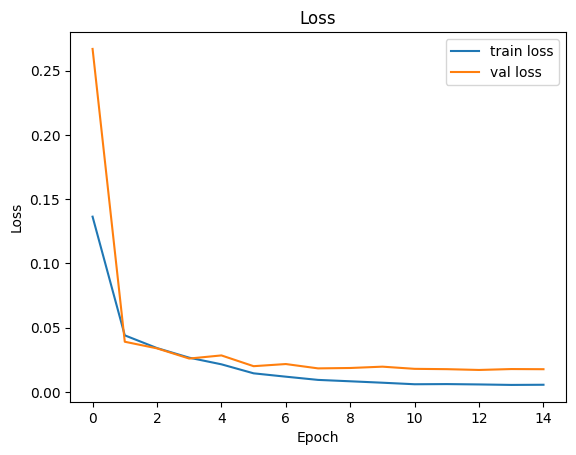

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

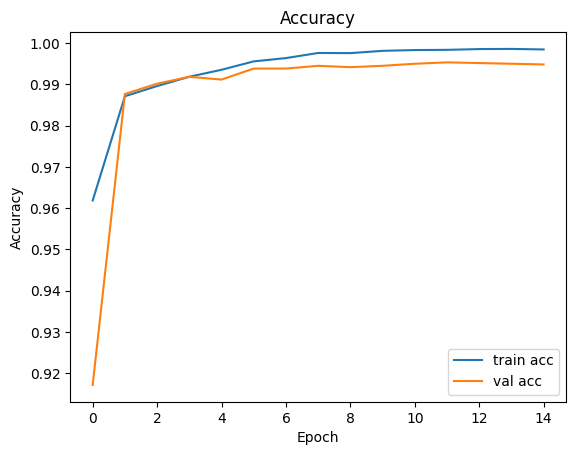

In [19]:
plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


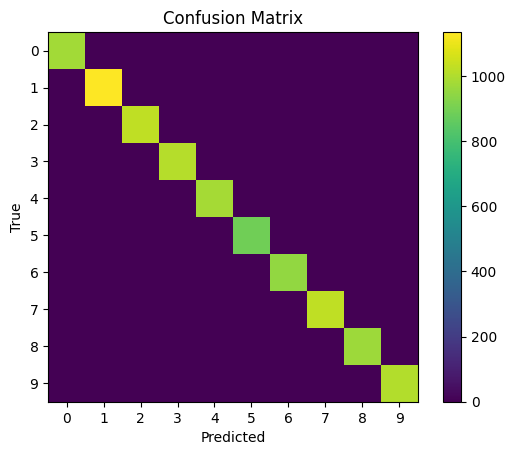

In [ ]:
import numpy as np

probs = model.predict(X_test, verbose=1)
y_pred = np.argmax(probs, axis=1)

cm = tf.math.confusion_matrix(y_test, y_pred, num_classes=10).numpy()

plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel("True")
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()


In [24]:
# Print the biggest confusions (off-diagonal)
cm_off = cm.copy()
np.fill_diagonal(cm_off, 0)
pairs = np.dstack(np.unravel_index(np.argsort(cm_off.ravel())[::-1], cm_off.shape))[0]

print("Top confusions (true -> pred : count)")
for i in range(10):
    t, p = pairs[i]
    print(f"{t} -> {p} : {cm[t, p]}")

Top confusions (true -> pred : count)
6 -> 0 : 3
2 -> 7 : 3
5 -> 3 : 3
9 -> 4 : 3
6 -> 1 : 2
8 -> 2 : 2
4 -> 9 : 2
3 -> 5 : 2
8 -> 0 : 2
5 -> 6 : 1


[ 321  582  659  947 1014 1232 1319 1878 1901 2035 2130 2182 2414 2462
 2597 2654 2896 2939 2953 3030 3422 3520 4571 4699 4740 5937 5955 6576
 6597 6625 9015 9634 9638 9664 9729 9792 9839]
[0.9222141  0.6811261  0.6197857  0.9481962  0.7516835  0.90458846
 0.5888411  0.83271223 0.99147594 0.9447537  0.99864894 0.6657054
 0.867934   0.54804534 0.98644096 0.9826021  0.9683774  0.76537794
 0.69179773 0.85898226 0.77179164 0.82020354 0.53417856 0.6018632
 0.6764393  0.9116413  0.98549634 0.722564   0.90428746 0.66516066
 0.51668185 0.83945805 0.8056391  0.5098196  0.99939394 0.5498325
 0.6842226 ]


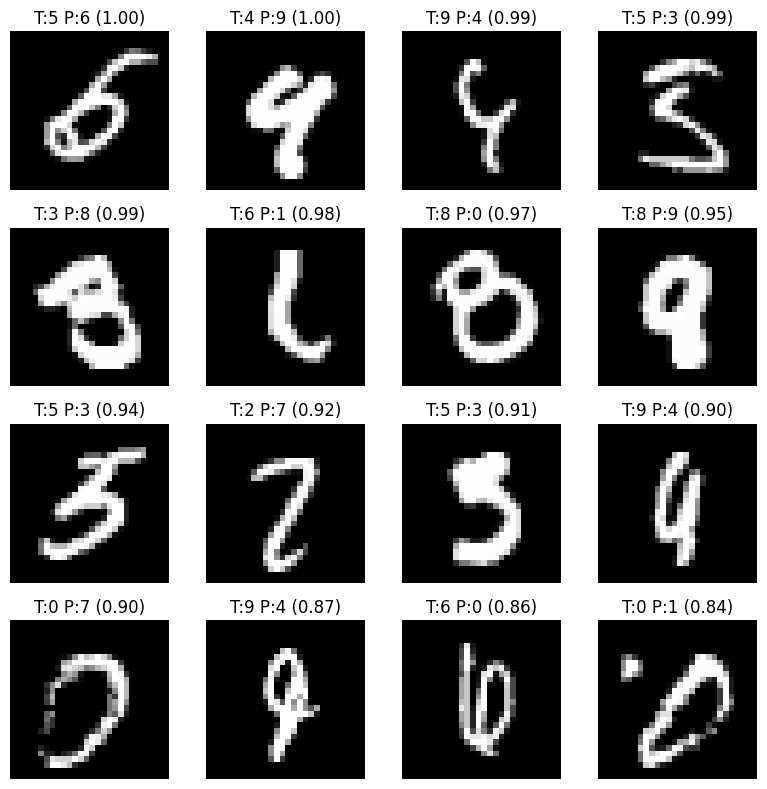

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

wrong_idx = np.where(y_pred != y_test)[0]
print(np.where(y_pred != y_test)[0])

# sort wrong predictions by confidence (highest first)

# y_pred[wrong_idx] --> This gives the predicted classes only for the wrong samples.
# Now the fancy indexing --> probs[wrong_idx, y_pred[wrong_idx]]
# This is “pairwise indexing”:
#   take row indices = wrong_idx
#   take column indices = predicted class for those rows
# So it returns:
#   [
#       probs[7, 3],     # confidence of predicted class (wrong) for sample 7
#       probs[19, 8],    # confidence of predicted class (wrong) for sample 19
#       probs[205, 1],   # ...
#       ...
#   ]
wrong_conf = probs[wrong_idx, y_pred[wrong_idx]]
top = wrong_idx[np.argsort(wrong_conf)[::-1]]

n = 16
plt.figure(figsize=(8, 8))
for i in range(n):
    idx = top[i]
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[idx].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"T:{y_test[idx]} P:{y_pred[idx]} ({probs[idx, y_pred[idx]]:.2f})")
plt.tight_layout()
plt.show()